In [77]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import re
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

In [34]:
def normalize(string):
    return re.sub("[^0-9a-zA-Z]+", " ", string.lower())

In [35]:
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  cleantext = cleantext.replace('\n', ' ')
  return cleantext

In [49]:
df=pd.read_csv("profiles.csv")
df=df.fillna(({'religion':'missing', 'drugs':'missing', 'drinks':'missing', 'ethnicity':'missing', 'job': 'missing', 
               'essay0':'','essay1':'','essay2':'','essay3':'','essay4':'','essay5':'',
               'essay6':'','essay7':'','essay8':'','essay9':''}))



for i in range(10):
    df["essay"+str(i)] = df["essay"+str(i)].apply(cleanhtml)
    df["essay"+str(i)] = df["essay"+str(i)].apply(normalize)
    df["essay"+str(i)] = df["essay"+str(i)].str.len()

df["essay_char_len"] = df.essay0 + df.essay1 + df.essay2 + df.essay3 + df.essay4 +  df.essay5 + df.essay6 + df.essay7 + df.essay8 + df.essay9    
for i in range(10):
    del df["essay"+str(i)]
    
    
    
lista_religion=[]
for r in list(df.religion):
    if "agnosticism" in str(r):
        lista_religion.append("agnosticim")
    if "atheism" in str(r):
        lista_religion.append("atheism")
    if "missing" in str(r):
        lista_religion.append("missing")
    if "christianity" in str(r):
        lista_religion.append("christianity")
    if "catholicism" in str(r):
        lista_religion.append("catholicism")
    if "buddhism" in str(r):
        lista_religion.append("buddhism")
    if "islam" in str(r):
        lista_religion.append("islam")
    if "other" in str(r):
        lista_religion.append("other")
    if "judaism" in str(r):
        lista_religion.append("judaism")
    if "hinduism" in str(r):
        lista_religion.append("hinduism")
        
df.religion = lista_religion
                             
df["height"] = df["height"].fillna(round(df["height"].mean(),0))
df["height"]=[round(df["height"].mean(),0) if x<50 else x for x in list(df["height"])]
df["height"]=df["height"]+100
df["age"]=[round(df["age"].mean(),0) if x>80 else x for x in list(df["age"])]

df

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,essay_char_len
0,22.0,a little extra,strictly anything,socially,never,working on college/university,"asian, white",175.0,-1,transportation,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,2386
1,35.0,average,mostly other,often,sometimes,working on space camp,white,170.0,80000,hospitality / travel,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,1339
2,38.0,thin,anything,socially,missing,graduated from masters program,missing,168.0,-1,missing,...,NaN,straight,has cats,missing,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,5136
3,23.0,thin,vegetarian,socially,missing,working on college/university,white,171.0,20000,student,...,doesn&rsquo;t want kids,straight,likes cats,missing,m,pisces,no,"english, german (poorly)",single,415
4,29.0,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",166.0,-1,artistic / musical / writer,...,NaN,straight,likes dogs and likes cats,missing,m,aquarius,no,english,single,622
5,29.0,average,mostly anything,socially,missing,graduated from college/university,white,167.0,-1,computer / hardware / software,...,"doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single,2244
6,32.0,fit,strictly anything,socially,never,graduated from college/university,"white, other",165.0,-1,missing,...,NaN,straight,likes dogs and likes cats,missing,f,virgo,NaN,english,single,1770
7,31.0,average,mostly anything,socially,never,graduated from college/university,white,165.0,-1,artistic / musical / writer,...,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single,1154
8,24.0,NaN,strictly anything,socially,missing,graduated from college/university,white,167.0,-1,missing,...,doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity but not too serious about it,f,gemini but it doesn&rsquo;t matter,when drinking,english,single,2079
9,37.0,athletic,mostly anything,not at all,never,working on two-year college,white,165.0,-1,student,...,NaN,straight,likes dogs and likes cats,atheism and laughing about it,m,cancer but it doesn&rsquo;t matter,no,english (fluently),single,2097


In [45]:
df_m = df[df.sex=="m"]
df_f = df[df.sex=="f"]

In [5]:
data = [go.Bar(
            x=['male'],
            y=[df.groupby("sex").get_group("m").count()[0]],
              marker=dict(color='cornflowerblue'),name="male"),
        go.Bar(
            x=['female'],
            y=[df.groupby("sex").get_group("f").count()[0]],
              marker=dict(color='darksalmon'),name="female")
             ]
layout = dict(title = 'Cantidad de hombres y mujeres',
              xaxis = dict(title = 'Sexo'),
              yaxis = dict(title = 'Cantidad')
              )
fig = dict(data=data, layout=layout)
iplot(fig)

In [6]:
# Create and style traces
trace0 = go.Scatter(
    x = df_m.groupby("age").count()["religion"].index,
    y = list(df_m.groupby("age").count()["religion"]),
    name = 'Male',
    line = dict(
        color = 'cornflowerblue',
        width = 4)
)
trace1 = go.Scatter(
    x = df_f.groupby("age").count()["religion"].index,
    y = list(df_f.groupby("age").count()["religion"]),
    name = 'Female',
    line = dict(
        color = "darksalmon",
        width = 4)
)
data = [trace0, trace1]

# Edit the layout
layout = dict(title = 'Cantidad por edad',
              xaxis = dict(title = 'Edad'),
              yaxis = dict(title = 'Cantidad'),
              )

fig = dict(data=data, layout=layout)
iplot(fig)

In [7]:
# Create and style traces
trace0 = go.Scatter(
    x = df_m.groupby("height").count()["religion"].index,
    y = list(df_m.groupby("height").count()["religion"]),
    name = 'Male',
    line = dict(
        color = 'cornflowerblue',
        width = 4)
)
trace1 = go.Scatter(
    x = df_f.groupby("height").count()["religion"].index,
    y = list(df_f.groupby("height").count()["religion"]),
    name = 'Female',
    line = dict(
        color = "darksalmon",
        width = 4)
)
data = [trace0, trace1]

# Edit the layout
layout = dict(title = 'Cantidad por Altura',
              xaxis = dict(title = 'Altura'),
              yaxis = dict(title = 'Cantidad'),
              )

fig = dict(data=data, layout=layout)
iplot(fig)

In [50]:
df_stem = df[df.job.isin(["science / tech / engineering", "computer / hardware / software"])]
df_noStem= df[df.job.isin(['transportation', 'hospitality / travel', 'artistic / musical / writer',
               'banking / financial / real estate', 'entertainment / media',
               'sales / marketing / biz dev', 'medicine / health',  'executive / management',
               'education / academia', 'clerical / administrative',
               'construction / craftsmanship', 'political / government', 'law / legal services', 'military'])]

In [9]:
trace1 = go.Bar(
    y=list(df_f.job.unique()),
    x=[len(df_m[df_m.job==x])  for x in list(df_m.job.unique())],
    marker=dict(color="cornflowerblue",
            opacity=0.6),name='Male',orientation='h'
)
trace2 = go.Bar(
    y=list(df_f.job.unique()),
    x=[len(df_f[df_f.job==x])  for x in list(df_f.job.unique())],
    marker=dict(color="darksalmon",
            opacity=0.6),
    name='Female',orientation='h'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack', margin=go.layout.Margin(
        l=250,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    title = 'Cantidad de Hombres y Mujeres por Ocupación',
              xaxis = dict(title = 'Cantidad')
              
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [14]:
trace1 = go.Bar(
    y=list(df_m.job.unique()),
    x=[len(df_m[df_m.job==x])/len(df.loc[df.job == x])  for x in list(df_m.job.unique())],
    marker=dict(color="cornflowerblue",
            opacity=0.6),name='Male',orientation='h'
)
trace2 = go.Bar(
    y=list(df_f.job.unique()),
    x=[len(df_f[df_f.job==x])/len(df.loc[df.job == x])   for x in list(df_f.job.unique())],
    marker=dict(color="darksalmon",
            opacity=0.6),
    name='Female',orientation='h'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack', margin=go.layout.Margin(
        l=250,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    title = 'Proporción (%) de Hombres y Mujeres por Ocupación',
     xaxis = dict(title = 'Proporción (%)',
        hoverformat = '.2%'
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [17]:
data = [go.Bar(
            x=['STEM'],
            y=[df_stem.groupby("sex").get_group("f").count()[0]],
              marker=dict(color='darksalmon'),name="female stem"),
             go.Bar(
            
            x=['NO STEM'],
            y=[df_noStem.groupby("sex").get_group("f").count()[0]],
              marker=dict(color='rgb(222, 35, 91)'),name="female no stem", opacity=0.6),
       go.Bar(
           x=['STEM'],
            y=[df_stem.groupby("sex").get_group("m").count()[0]],
              marker=dict(color='cornflowerblue'),name="male stem"),
             go.Bar(
            x=['NO STEM'],
            y=[df_noStem.groupby("sex").get_group("m").count()[0]],
              marker=dict(color='rgb(35, 103, 222)'),name="male no stem", opacity=0.6)]

layout = go.Layout(
    barmode='stack', margin=go.layout.Margin(
        l=125,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    yaxis = dict(title="Cantidad"),
     xaxis = dict( title= "Tipo de carrera",
        hoverformat = '.2%'
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [18]:
data = [go.Bar(
            x=['Single STEM'],
            y=[df_stem[df_stem.status == "single"].groupby("sex").get_group("f").count()[0]],
              marker=dict(color='darksalmon'),name="female stem"),
             go.Bar(
            
            x=['Single NO STEM'],
            y=[df_noStem[df_noStem.status == "single"].groupby("sex").get_group("f").count()[0]],
              marker=dict(color='rgb(222, 35, 91)'),name="female no stem", opacity=0.6),
       go.Bar(
           x=['Single STEM'],
            y=[df_stem[df_stem.status == "single"].groupby("sex").get_group("m").count()[0]],
              marker=dict(color='cornflowerblue'),name="male stem"),
             go.Bar(
            x=['Single NO STEM'],
            y=[df_noStem[df_noStem.status == "single"].groupby("sex").get_group("m").count()[0]],
               marker=dict(color='rgb(35, 103, 222)'),name="male no stem", opacity=0.6)]

layout = go.Layout(
    barmode='stack', margin=go.layout.Margin(
        l=125,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    yaxis = dict(title="Cantidad"),
     xaxis = dict( title= "Tipo de carrera",
        hoverformat = '.2%'
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [70]:
# Create and style traces
trace0 = go.Scatter(
    x = df_stem.groupby("age").sum().index,
    y = df_stem.groupby("age").sum()["essay_char_len"],
    name = 'STEM',
    line = dict(
        color = 'rgb(167, 103, 4)',
        width = 4)
)
trace1 = go.Scatter(
    x = df_noStem.groupby("age").sum().index,
    y = df_noStem.groupby("age").sum()["essay_char_len"],
    name = 'NO STEM',
    line = dict(
        color = "rgb(32, 205, 119)",
        width = 4)
)
data = [trace0, trace1]

# Edit the layout
layout = dict(title = 'Cantidad de caracteres escritos por personas de carreras STEM y no STEM ordenado por edad',
              xaxis = dict(title = 'Edad'),
              yaxis = dict(title = 'Cantidad de caracteres'),
              )

fig = dict(data=data, layout=layout)
iplot(fig)

In [103]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

y0 = df[(df.income>0) & (df.religion=="agnosticim")]["income"]
y1 = df[(df.income>0) & (df.religion=="atheism")]["income"]
y2 = df[(df.income>0) & (df.religion=="buddhism")]["income"]
y3 = df[(df.income>0) & (df.religion=="catholicism")]["income"]
y4 = df[(df.income>0) & (df.religion=="christianity")]["income"]
y5 = df[(df.income>0) & (df.religion=="hinduism")]["income"]
y6 = df[(df.income>0) & (df.religion=="islam")]["income"]
y7 = df[(df.income>0) & (df.religion=="judaism")]["income"]
y8 = df[(df.income>0) & (df.religion=="missing")]["income"]
y9 = df[(df.income>0) & (df.religion=="other")]["income"]


trace0 = go.Box(
    y=y0,
    name = 'agnosticim',
)

trace1 = go.Box(
    y=y1,
    name = 'atheism',
)

trace2 = go.Box(
    y=y2,
    name = 'buddhism',
)

trace3 = go.Box(
    y=y3,
    name = 'catholicism',
)

trace4 = go.Box(
    y=y4,
    name = 'christianity',
)

trace5 = go.Box(
    y=y5,
    name = 'hinduism',
)

trace6 = go.Box(
    y=y6,
    name = 'islam',
)

trace7 = go.Box(
    y=y7,
    name = 'judaism',
)

trace8 = go.Box(
    y=y8,
    name = 'missing',
)

trace9 = go.Box(
    y=y9,
    name = 'other',
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7,trace8, trace9]
py.iplot(data)

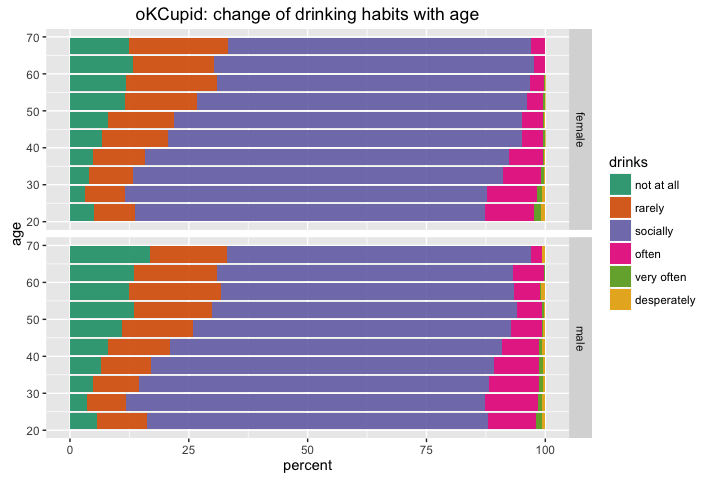

In [ ]:
df_m.groupby("age")

In [66]:
# Create and style traces
trace0 = go.Scatter(
    x = df.groupby("sex").get_group("m").sum().index,
    y = df.groupby("sex").get_group("m").sum()["essay_char_len"],
    name = 'male',
    line = dict(
        color = 'cornflowerblue',
        width = 4)
)
trace1 = go.Scatter(
    x = df.groupby("sex").get_group("f").sum().index,
    y = df.groupby("sex").get_group("f").sum()["essay_char_len"],
    name = 'female',
    line = dict(
        color = "darksalmon",
        width = 4)
)
data = [trace0, trace1]

# Edit the layout
layout = dict(title = 'Cantidad de caracteres escritos por personas de carreras STEM y no STEM ordenado por edad',
              xaxis = dict(title = 'Edad'),
              yaxis = dict(title = 'Cantidad de caracteres'),
              )

fig = dict(data=data, layout=layout)
iplot(fig)

ValueError: 
    Invalid value of type 'numpy.int64' received for the 'y' property of scatter
        Received value: 70391639

    The 'y' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [69]:
df.groupby("sex").get_group("f")

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,essay_char_len
6,32.0,fit,strictly anything,socially,never,graduated from college/university,"white, other",165.0,-1,missing,...,NaN,straight,likes dogs and likes cats,missing,f,virgo,NaN,english,single,1770
7,31.0,average,mostly anything,socially,never,graduated from college/university,white,165.0,-1,artistic / musical / writer,...,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single,1154
8,24.0,NaN,strictly anything,socially,missing,graduated from college/university,white,167.0,-1,missing,...,doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity but not too serious about it,f,gemini but it doesn&rsquo;t matter,when drinking,english,single,2079
13,30.0,skinny,mostly anything,socially,never,graduated from high school,white,166.0,30000,sales / marketing / biz dev,...,NaN,straight,has dogs and likes cats,christianity but not too serious about it,f,NaN,no,english,single,0
14,29.0,thin,mostly anything,socially,never,working on college/university,"hispanic / latin, white",162.0,50000,other,...,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and has cats,catholicism,f,taurus,no,english,single,2380
15,39.0,fit,strictly anything,socially,missing,graduated from college/university,white,165.0,-1,medicine / health,...,doesn&rsquo;t have kids,straight,likes dogs and has cats,atheism and laughing about it,f,aquarius but it doesn&rsquo;t matter,no,"english (fluently), spanish (okay)",single,757
17,26.0,average,NaN,socially,never,working on college/university,hispanic / latin,164.0,-1,banking / financial / real estate,...,doesn&rsquo;t have kids,straight,NaN,missing,f,aries and it&rsquo;s fun to think about,no,english,single,3837
20,27.0,average,mostly anything,socially,never,graduated from college/university,white,167.0,-1,sales / marketing / biz dev,...,NaN,straight,likes dogs and dislikes cats,catholicism,f,libra,no,english (fluently),single,1394
21,22.0,athletic,NaN,socially,never,working on college/university,missing,167.0,-1,student,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,catholicism and somewhat serious about it,f,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",single,838
30,27.0,average,anything,socially,missing,working on college/university,white,164.0,-1,other,...,NaN,straight,NaN,agnosticism,f,gemini,trying to quit,"english, spanish (poorly)",single,782


In [84]:
df.drugs.unique()


array(['never', 'sometimes', nan, 'often'], dtype=object)

In [101]:
cont_table

drugs,missing,never,often,sometimes
drinks,,,,
desperately,90,112,31,89
missing,1372,1523,11,79
not at all,200,2920,19,128
often,1335,2149,85,1595
rarely,769,4590,46,552
socially,10249,26257,160,5114
very often,65,173,58,175


In [93]:
cont_table.values


array([[   90,   112,    31,    89],
       [ 1372,  1523,    11,    79],
       [  200,  2920,    19,   128],
       [ 1335,  2149,    85,  1595],
       [  769,  4590,    46,   552],
       [10249, 26257,   160,  5114],
       [   65,   173,    58,   175]], dtype=int64)

In [94]:
cont_table.columns

Index(['missing', 'never', 'often', 'sometimes'], dtype='object', name='drugs')

In [95]:
cont_table.index

Index(['desperately', 'missing', 'not at all', 'often', 'rarely', 'socially',
       'very often'],
      dtype='object', name='drinks')

In [112]:
print(["1","2","3"].reverse())

None


In [117]:
cont_table=pd.crosstab(df.drinks, df.drugs)

import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Heatmap(z=cont_table.values, x=cont_table.columns,
                   y=cont_table.index, colorscale='Greens')
data=[trace]
py.iplot(data)

In [127]:
cont_table

drugs,missing,never,often,sometimes
drinks,,,,
desperately,90,112,31,89
missing,1372,1523,11,79
not at all,200,2920,19,128
often,1335,2149,85,1595
rarely,769,4590,46,552
socially,10249,26257,160,5114
very often,65,173,58,175


In [130]:
df[["drugs", "drinks"]].head()

,drugs,drinks
0,never,socially
1,sometimes,often
2,missing,socially
3,missing,socially
4,never,socially


In [128]:
cont_table.corr()

drugs,missing,never,often,sometimes
drugs,,,,
missing,1.000000,0.983093,0.876313,0.970312
never,0.983093,1.000000,0.861686,0.956873
often,0.876313,0.861686,1.000000,0.954783
sometimes,0.970312,0.956873,0.954783,1.000000


In [34]:
pd.crosstab(df.orientation,df.sex)

sex,f,m
orientation,,
bisexual,1996,771
gay,1588,3985
straight,20533,31073


In [31]:
data=pd.crosstab(df.orientation,df.sex).sort_values(["m", "f"])
data.f.head()

location
bellingham, washington        1
bellwood, illinois            1
cambridge, massachusetts      1
canyon country, california    1
chico, california             1
Name: f, dtype: int64

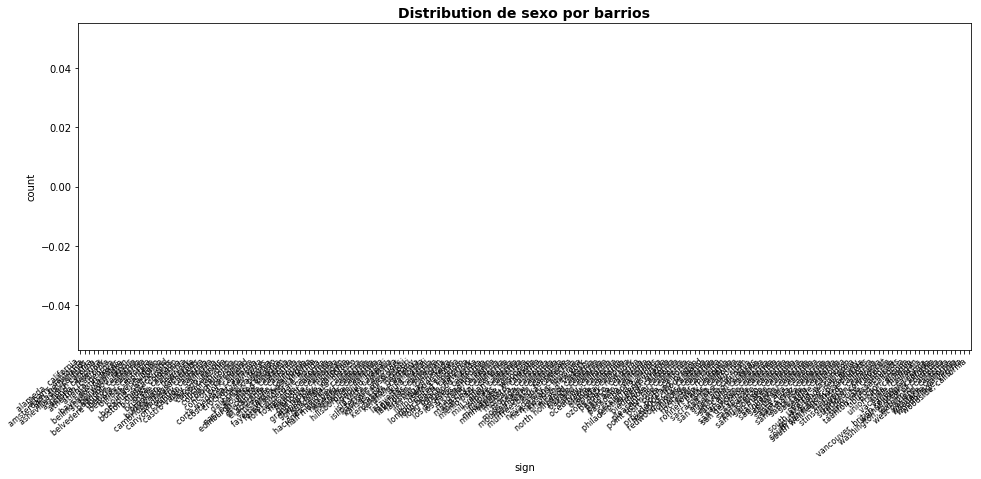

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,6))
ax = sns.countplot(x='sign', data=df, order=sorted(df.location.unique()))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution de sexo por barrios', fontsize=14, fontweight='bold')
plt.show()